# **포털사이트 크롤링**

In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity="all"

In [2]:
import warnings
warnings.filterwarnings(action='ignore')

In [3]:
import pandas as pd
import bs4
import requests
from urllib.request import urlopen

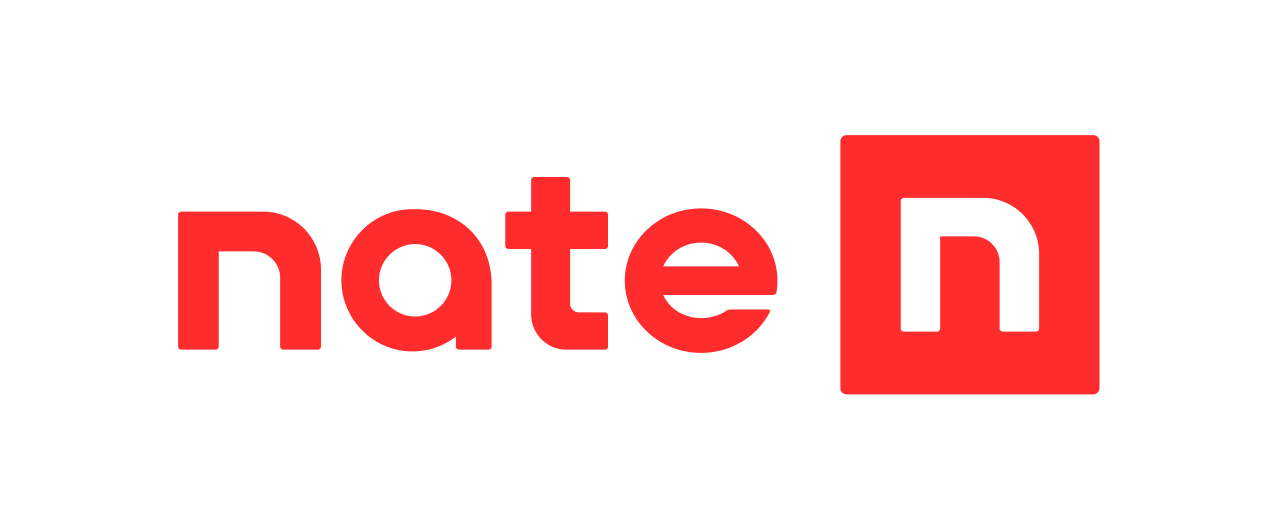

## **네이트 사이트의 메뉴 추출**

### **🔸 메뉴명과 연결 url을 추출**

In [4]:
# url 정의
url = 'https://www.nate.com'

In [5]:
# response 객체 얻어오기
html = urlopen(url)
html

In [6]:
# 전달된 소스코드만 추출하기 
html_text = html.read()

In [7]:
# binary code 형태로 되어있는 소스코드 -> bs4 객체로 변환
bs_obj = bs4.BeautifulSoup(html_text, 'html.parser')

In [8]:
# 확인
# print(bs_obj.prettify())

In [9]:
# 네이트 사이트의 메뉴 Selector 확인
# #divGnb

In [10]:
# 메뉴 Selector 변수로 저장해두기
menu = bs_obj.find('div', {'id':'divGnb'})
menu_li = menu.select('li')
# menu_li

In [11]:
# 소스코드 구조 보기
menu_li[0]
menu_li[0].text
menu_li[0].a
menu_li[0].a['href']

<li class="mail"><a href="https://mail3.nate.com/#index" onmousedown="nc('NGB01');">메일</a></li>

'메일'

<a href="https://mail3.nate.com/#index" onmousedown="nc('NGB01');">메일</a>

'https://mail3.nate.com/#index'

In [12]:
# 메뉴명과 링크 뽑는 코드 확인하기
for li in menu_li:
    print(li.text, li.a['href'])

# Action List
## 중복이 되는 메뉴는 제외 (더보기 내에 중복되어 있음)
## href 가 없는 메뉴는 제외
## 'javascript' 태그명 제외 

메일 https://mail3.nate.com/#index
뉴스 //news.nate.com/
판 https://pann.nate.com/
AI챗beta https://m.nate.com/aichat.html
TV https://tv.nate.com/
툰앤북 https://toonnbook.nate.com/
운세 https://fortune.nate.com/home/main.nate
게임 http://game.nate.com/
쇼핑 //shopping.nate.com/
팀룸 https://nateonweb.nate.com/teamroom/
네이트뷰 https://view.nate.com/

더보기


뉴스
날씨
스포츠
연예
아이돌24
랭킹뉴스


판
톡톡
판포토
팬톡


네이트온
네이트캐쉬
문자메시지
주소록


컬러링
이슈UP추천

서비스 전체보기
더보기 닫기

 javascript:;
뉴스 //news.nate.com
날씨 //news.nate.com/Weather
스포츠 //sports.news.nate.com/
연예 //news.nate.com/ent/index
아이돌24 //news.nate.com/ent/idol24
랭킹뉴스 //news.nate.com/rank/interest
판 https://pann.nate.com/
톡톡 https://pann.nate.com/talk
판포토 https://pann.nate.com/talk/imageTheme/index
팬톡 https://pann.nate.com/fantalk
네이트온 //nateonweb.nate.com/
네이트캐쉬 //cash.nate.com/center/cashMain.sc
문자메시지 https://sms.nate.com/
주소록 https://mail.nate.com/pims/
컬러링 //mobile.nate.com/
이슈UP추천 //editor.nate.com/


### **🔸 메뉴명과 링크 DF 만들기**
- 빈 df를 생성 후, df에 data를 행으로 추가
- 각각의 행을 df로 생성 후, concat 함수로 결합

In [13]:
# 빈 df 생성
nate_menu = pd.DataFrame({'메뉴':[], '링크':[]})
nate_menu

,메뉴,링크


In [14]:
# 메뉴명과 링크 뽑기
# Action List
## 중복이 되는 메뉴는 제외 (더보기 내에 중복되어 있음)
## href 가 없는 메뉴는 제외
## 'javascript' 태그명 제외

index = 0
for li in menu_li:
    menu_text = li.text
    menu_link = li.a['href']
    if menu_text in nate_menu['메뉴'].values or menu_link == '' or menu_link == 'javascript:;':
        continue
    temp = pd.DataFrame({'메뉴':menu_text, '링크':menu_link}, index=[index])
    nate_menu = pd.concat([nate_menu, temp])
    index = index + 1
nate_menu

,메뉴,링크
0,메일,https://mail3.nate.com/#index
1,뉴스,//news.nate.com/
2,판,https://pann.nate.com/
3,AI챗beta,https://m.nate.com/aichat.html
4,TV,https://tv.nate.com/
5,툰앤북,https://toonnbook.nate.com/
6,운세,https://fortune.nate.com/home/main.nate
7,게임,http://game.nate.com/
8,쇼핑,//shopping.nate.com/
9,팀룸,https://nateonweb.nate.com/teamroom/


### **🔸 수집 데이터 저장**
- DataLake에 rawdata 그대로 저장
- 저장 공간은 crawl_data 공간에 저장

In [15]:
# 저장공간 존재 여부 확인 후 없으면 생성
import os

if not os.path.exists('crawl_data'):
    os.makedirs('crawl_data')

In [16]:
# 파일 저장
nate_menu.to_csv('./crawl_data/nate_menu.csv')

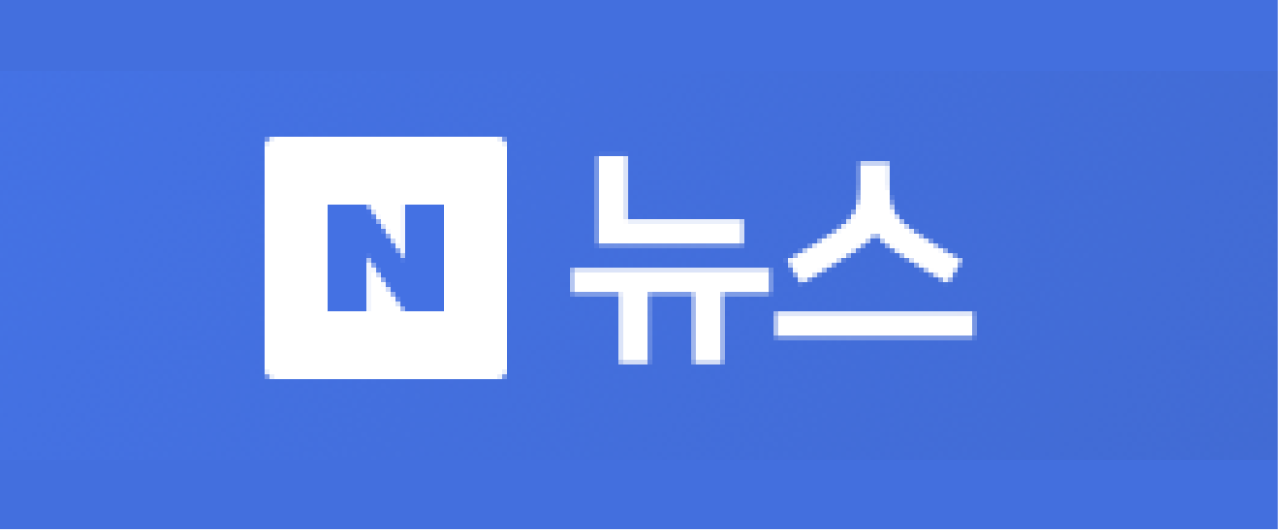

## **네이버 뉴스 크롤링**
- 네이버 뉴스는 네이버 정책에 따라 모든 언론사들의 뉴스가 랜덤하게 배치됨
- 헤드라인 뉴스는 표면적으로는 제공되지 않는다
- 네이버 메인 페이지는 upgrade 정책에 따라 동적구성되는 경우가 있기 때문에, **셀레니움**을 사용해야 함
- sub 페이지는 정적구성 이므로 sub인 news로 바로 접근 

### **🔸 네이버 뉴스 메뉴 추출**

In [17]:
# 소스코드 받아오기 및 bs4 객체로 저장
url = 'https://news.naver.com'
html = urlopen(url)
html_text = html.read()
bs_obj = bs4.BeautifulSoup(html_text, 'html.parser')
# print(bs_obj.prettify())

In [18]:
# 네이버 사이트의 메뉴 Selector 확인
# bs_obj.select('body > section > header > div.Nlnb._float_lnb > div')

In [19]:
# ul 태그 추출 
ul = bs_obj.find('ul', {'class':'Nlnb_menu_list'})
# ul

In [20]:
# li 태그 추출
lis = ul.findAll('li')
print(len(lis))
# print(lis)
print(type(lis))

14
<class 'bs4.element.ResultSet'>


In [21]:
# a태그, text (링크, 메뉴명) 추출하기 위해 확인
for li in lis:
    a_tag = li.find('a')
    print(a_tag.text, " : ", a_tag['href'])

# 별다른 문제 없이 잘 들어가 있는 것이 확인됨 

언론사별  :  https://news.naver.com/?viewType=pc
정치  :  https://news.naver.com/main/main.naver?mode=LSD&mid=shm&sid1=100
경제  :  https://news.naver.com/main/main.naver?mode=LSD&mid=shm&sid1=101
사회  :  https://news.naver.com/main/main.naver?mode=LSD&mid=shm&sid1=102
생활/문화  :  https://news.naver.com/main/main.naver?mode=LSD&mid=shm&sid1=103
IT/과학  :  https://news.naver.com/main/main.naver?mode=LSD&mid=shm&sid1=105
세계  :  https://news.naver.com/main/main.naver?mode=LSD&mid=shm&sid1=104
랭킹  :  https://news.naver.com/main/ranking/popularDay.naver
신문보기  :  https://news.naver.com/newspaper/home?viewType=pc
오피니언  :  https://news.naver.com/opinion/home
TV  :  https://news.naver.com/main/tv/index.naver?mid=tvh
팩트체크  :  https://news.naver.com/factcheck/main
알고리즘 안내  :  https://media.naver.com/algorithm
정정보도 모음  :  https://news.naver.com/main/ombudsman/errorArticleList.naver?mid=omb


In [22]:
# 메뉴 df 생성
# 위 네이터와 다르게, 데이터가 잘 뽑혔기 때문에 리스트에 각 컬럼 데이터를 모은 후 df 로 구성 

section = []
link = []
for li in lis:
    a_tag = li.find('a')
    section.append(a_tag.text)
    link.append(a_tag['href'])

col_dict = {'메뉴':section, '링크':link}
naver_news_menu = pd.DataFrame(col_dict)
naver_news_menu

,메뉴,링크
0,언론사별,https://news.naver.com/?viewType=pc
1,정치,https://news.naver.com/main/main.naver?mode=LS...
2,경제,https://news.naver.com/main/main.naver?mode=LS...
3,사회,https://news.naver.com/main/main.naver?mode=LS...
4,생활/문화,https://news.naver.com/main/main.naver?mode=LS...
5,IT/과학,https://news.naver.com/main/main.naver?mode=LS...
6,세계,https://news.naver.com/main/main.naver?mode=LS...
7,랭킹,https://news.naver.com/main/ranking/popularDay...
8,신문보기,https://news.naver.com/newspaper/home?viewType=pc
9,오피니언,https://news.naver.com/opinion/home


In [23]:
# DataLake 에 저장
naver_news_menu.to_csv('./crawl_data/naver_news_menu.csv')

### **🔸 '언론사별' 섹션의 첫번째 언론사 뉴스 크롤링**
- 기사 타이틀과 기사 요약 언론사명 기고날짜를 추출해서 출력하는 코드 작성
- 네이버 뉴스 소스코드 받아오는 코드부터 작성

In [24]:
# 소스코드 받아오기 및 bs4 객체로 저장
url = "https://news.naver.com/?viewType=pc"
html = urlopen(url)
html_text = html.read()
bs_obj = bs4.BeautifulSoup(html_text, 'html.parser')


# Selector 확인
# bs_obj.select('#ct > div > section.main_content > div.main_brick > div > div:nth-child(1) > div.main_brick_item._channel_news_preview_wrapper')


# 첫번째 언론사 Selector 추출
cjs = bs_obj.find('div', {'class':'cjs_channel_card'})


# 첫번째 기사 추출
## 한 기사가 개별 div로 묶여있지 않고,  title, contents 구분되어 있음 
cjs_1_title = cjs.find('div', {'class':'cjs_ctitle _item_title'})
cjs_1_contents = cjs.find('div', {'class':'cjs_journal_wrap _item_contents'})


# 첫번째 기사 항목 추출
## 기고날짜 (cjs_1_title)
datetime = cjs_1_title.find('span', {'class':'datetime'}).text
## 언론사명 (cjs_1_title)
h4 = cjs_1_title.find('h4', {'class':'channel'})
channel = []
for h in h4:
    span = h4.find('span', {'class':'datetime'})
    if h != span:
        channel.append(h)
## 기사 타이틀 (cjs_1_contents) 
title = cjs_1_contents.find('div', {'class':'cjs_t'}).text
## 기사 요약 (cjs_1_contents) 
summary = cjs_1_contents.find('p', {'class':'cjs_d'}).text
### dict 로 저장
col_dict = {'기사 타이틀':title,
            '기사 요약':summary,
           '언론사':channel,
           '기고 날짜':datetime}

# 결과
col_dict

{'기사 타이틀': '헤어진 여성 상대 4시간 흉기 인질극…스토킹 재판받던 중 범행',
 '기사 요약': '헤어진 여성을 스토킹한 혐의(스토킹범죄의 처벌 등에 관한 법률 위반 등)로 불구속 상태에서 재판을 받던 남성이 흉기를 휘두르며 여성을 붙잡고 인질극을 벌이다가 경찰에 검거됐다. 11일 경남경찰청 설명을 종합하면, 2',
 '언론사': ['한겨레'],
 '기고 날짜': '12월 11일 21:10'}

### **🔸 네이버 뉴스의 섹션별 Headline 뉴스의 제목/요약/세부link**
- 섹션 : 정치/경제/사회/생활,문화/IT,과학/세계
- layout이 동일하기 때문에 한 섹션을 예시 코드로 작성 후, 모든 섹션에 대해 적용

In [25]:
# 섹션 메뉴의 url을 저장하고 있는 file
df_menu = pd.read_csv('./crawl_data/naver_news_menu.csv', index_col=0)
df_menu.head()

,메뉴,링크
0,언론사별,https://news.naver.com/?viewType=pc
1,정치,https://news.naver.com/main/main.naver?mode=LS...
2,경제,https://news.naver.com/main/main.naver?mode=LS...
3,사회,https://news.naver.com/main/main.naver?mode=LS...
4,생활/문화,https://news.naver.com/main/main.naver?mode=LS...


#### **경제 섹션을 예시 코드로 작성**

In [26]:
# 경제 섹션 url 추출
df_menu['링크'][2]

'https://news.naver.com/main/main.naver?mode=LSD&mid=shm&sid1=101'

In [27]:
# 요청 방법 (1) - 네이버 서버에게 url 전송해서 요청하는 방법
url = df_menu['링크'][2]
res = urlopen(url)
html_text = res.read()
# html_text

In [28]:
# 요청 방법 (2) - header를 포함해서 요청하는 방법 
url = df_menu['링크'][2]
headers = {'User-Agent':
'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/119.0.0.0 Safari/537.36'}
res = requests.get(url, headers=headers)
html = res.text
# html

In [29]:
html = urlopen(url)
bs_obj = bs4.BeautifulSoup(html_text, 'html.parser')
#bs_obj

In [30]:
# headline 뉴스의 뉴스 제목 추출
head_L = bs_obj.findAll('div', {'class':'sh_text'})
# print(len(head_L)) # 브라우저에서는 5개가 보이지만 10개가 나옴 => js로 생성된 더보기 기능이 있고 숨겨져 있는 뉴스까지 모두 추출
# print(head_L)

In [31]:
# headline 뉴스의 구성
## 기사 제목
print('기사 제목 :', head_L[0].a.text)
## 기사 링크
print('기사 링크 :', head_L[0].a['href'])
## 기사 요약
print('기사 요약 :', head_L[0].div.text)
## 언론사
print('언론사 :', head_L[0].find('div', {'class':'sh_text_press'}).text)

기사 제목 : HMM 매각 진통…12일 관계부처 차관회의[시그널]
기사 링크 : https://n.news.naver.com/mnews/article/011/0004272861?sid=101
기사 요약 : HMM의 새 주인을 가를 우선협상 대상자 선정이 영구채 전환 논란 등으로 인해 늦어지는 가운데 관계부처 차관회의가 열린다. 다만 신속한 매각을 원하는 금 …
언론사 : 서울경제


In [32]:
# 모든 뉴스에 대해 구성요소 가져오기
# for head in head_L:
#     print(head.a.text)
#     print(head.a['href'])
#     print(head.div.text)
#     print(head.find('div', {'class':'sh_text_press'}).text)

#### **모든 섹션에 적용 가능하도록 함수로 구성**
📣 <br>
- 6개의 섹션의 헤드라인 뉴스에 대한 `뉴스 제목`, `뉴스의 링크`, `뉴스의 섹션`만 추출 할 예정 -> df로 저장

🤖 <br>
- **함수명 & 파라미터** : `get_headline(섹션별url, 섹션명)`
- **리턴값** : `섹션별 수집 데이터를 dict로 구성 후 반환` 

In [33]:
# 함수 구성
def get_headline(url, section):
    # 딕셔너리 구성하기 위해 수집 데이터 저장할 빈 List 생성
    head_title=[]
    head_link=[]
    
    # 서버 요청 응답 (많은 요청이 발생할 수 있으므로 거부 대비 헤더 추가)
    headers = {'User-Agent':
    'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/119.0.0.0 Safari/537.36'}
    res = requests.get(url, headers=headers)
    
    # bs4객체 (파서기) 생성 
    html = res.text # requests 객체는 text 속성을 사용해야만 소스가 전달됨 
    bs_obj = bs4.BeautifulSoup(html, 'html.parser')
    
    # headline 뉴스 추출
    head_L = bs_obj.findAll('div', {'class':'sh_text'})
    
    # headline 구성 요소 (뉴스 제목, 뉴스의 링크, 뉴스의 섹션)
    for head in head_L:
        head_title.append(head.a.text)
        head_link.append(head.a['href'])
    return({"head_line":head_title, "news_link":head_link, "section":section})

In [34]:
# 확인
for i in range(1,7):
    print(get_headline(df_menu['링크'][i], df_menu['메뉴'][i]))

{'head_line': ['9월 추락한 전투기 KF-16, 원인 뭐길래...軍 "이런 문제는 처음"', '민주, 1호 청년정책은… ‘월 20만원대 대학기숙사 5만호 공급’', '더불어민주당 강릉지역위원회, 운영위원장 체제로 전환', '[단독]짐 로저스 “주식·채권·부동산 모두 거품…내년엔 이곳에 투자하라”', '윤재옥, 노란봉투법·방송법 재추진 예고한 민주당 향해 “입법 테러”', '민주당 인재영입 1호 ‘기후위기 활동가’ 박지혜 변호사', '野 “‘김건희 특검법’ 거부하면 與 총선 폭망”…與 “죄 없는 사람, 죄인 만들면 안돼”', '정세균 "난 통합론자"…이낙연 등 3총리 연대설에 "그런 것 없다"', '예비후보자 등록 시작되는데…‘선거구 획정’ 안돼 우는 정치신인들', '‘연평 영웅’ 이희완 신임차관, 오늘 보훈부 취임식에 앞서 대전 전사자 묘역 찾아 ‘신고’'], 'news_link': ['https://n.news.naver.com/mnews/article/025/0003327658?sid=100', 'https://n.news.naver.com/mnews/article/005/0001658771?sid=100', 'https://n.news.naver.com/mnews/article/087/0001012382?sid=100', 'https://n.news.naver.com/mnews/article/009/0005228132?sid=100', 'https://n.news.naver.com/mnews/article/021/0002610123?sid=100', 'https://n.news.naver.com/mnews/article/005/0001658672?sid=100', 'https://n.news.naver.com/mnews/article/005/0001658766?sid=100', 'https://n.news.naver.com/mnews/article/448/0000439739?sid=100', 'https://n.news.naver.com/mn

#### **모든 섹션에 함수 적용 후 DF로 생성**
- `get_headline` 함수가 dict로 반환하므로
- 빈 df 생성 후 누적 df에 결합해서 모두 누적시키기

In [35]:
# 모든 뉴스 저장할 빈 df 생성
# 컬럼명은 함수에서 반환되는 dict의 key와 동일해야 함 
head_df = pd.DataFrame({"head_line":[], "news_link":[], "section":[]})
head_df

,head_line,news_link,section


In [36]:
for i in range(1,7):
    temp = pd.DataFrame(get_headline(df_menu['링크'][i], df_menu['메뉴'][i])) # 섹션별로 함수가 반환한 data로 구성한 df
    head_df = pd.concat([head_df, temp], axis=0, ignore_index=True) # 누적 df

In [37]:
head_df.head()

,head_line,news_link,section
0,내년 경제정책방향 발표 최상목 후보자 데뷔 무대 되나,https://n.news.naver.com/mnews/article/016/000...,정치
1,"尹, '김건희 특검법'에 거부권 행사할까?[이슈분석]",https://n.news.naver.com/mnews/article/448/000...,정치
2,"지지율 하락에 ‘영부인 리스크’… 尹, 발길 무거운 네덜란드 순방",https://n.news.naver.com/mnews/article/023/000...,정치
3,"'준연동형이냐 병립형이냐'…민주, 비례대표제 여론조사 진행중",https://n.news.naver.com/mnews/article/421/000...,정치
4,“불출마” 제로… 기득권 포기않는 여당,https://n.news.naver.com/mnews/article/021/000...,정치


In [38]:
head_df.tail()

,head_line,news_link,section
49,필리핀 선박에 ‘물대포’ 퍼부은 중국 해경…이틀째 책임 공방 이어져 [현장영상],https://n.news.naver.com/mnews/article/056/001...,세계
50,"아르헨 밀레이 대통령 취임 ""최악 정부 물려받아…개혁만이 해법""",https://n.news.naver.com/mnews/article/055/000...,세계
51,"IEA ""COP28 온실가스 약속대론 2030 감축목표 30%에 그쳐""",https://n.news.naver.com/mnews/article/001/001...,세계
52,유엔 12일 긴급총회…안보리 마비 속 ‘가자휴전 총의’ 모은다,https://n.news.naver.com/mnews/article/056/001...,세계
53,“우승 상금 60억”…실사판 ‘오징어 게임’ 우승자는 누구?,https://n.news.naver.com/mnews/article/022/000...,세계


In [39]:
# 파일로 저장
head_df.to_csv('./crawl_data/naver_news_headline.csv')

### **🔸 네이버 뉴스 섹션별 Headline 원문 기사 크롤링**
- 기사제목, 상세보기, Url, 언론사, 작성 날짜 등

In [40]:
# 수집할 기사의 url
head_L_df = pd.read_csv('./crawl_data/naver_news_headline.csv', index_col=0)
head_L_df.tail()

,head_line,news_link,section
49,필리핀 선박에 ‘물대포’ 퍼부은 중국 해경…이틀째 책임 공방 이어져 [현장영상],https://n.news.naver.com/mnews/article/056/001...,세계
50,"아르헨 밀레이 대통령 취임 ""최악 정부 물려받아…개혁만이 해법""",https://n.news.naver.com/mnews/article/055/000...,세계
51,"IEA ""COP28 온실가스 약속대론 2030 감축목표 30%에 그쳐""",https://n.news.naver.com/mnews/article/001/001...,세계
52,유엔 12일 긴급총회…안보리 마비 속 ‘가자휴전 총의’ 모은다,https://n.news.naver.com/mnews/article/056/001...,세계
53,“우승 상금 60억”…실사판 ‘오징어 게임’ 우승자는 누구?,https://n.news.naver.com/mnews/article/022/000...,세계


#### **1가지 뉴스로 예시 코드 작성**

In [41]:
url = head_L_df['news_link'][51]
url

'https://n.news.naver.com/mnews/article/001/0014381987?sid=104'

In [42]:
# 서버 요청
headers = {'User-Agent':
    'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/119.0.0.0 Safari/537.36'}
res = requests.get(url, headers=headers)

In [43]:
# bs4객체 (파서기) 생성 
html = res.text
bs_obj = bs4.BeautifulSoup(html, 'html.parser')

In [44]:
# 추출하려고 하는 뉴스 기사 영역
# bs_obj.find('div', {'id':'ct'})

* 추출 항목 - 기사제목, 상세보기, Url, 언론사, 작성 날짜 등

In [45]:
# 추출하려고 하는 뉴스 기사 영역
content = bs_obj.find('div', {'id':'ct'})

In [46]:
# 언론사
channel = content.find('a').img['alt']
channel

'연합뉴스'

In [47]:
# 기사 작성자 / 작성 날짜 / 좋아요 수 / 댓글 수 포함된 Selector
info = content.select('#ct > div.media_end_head.go_trans > div.media_end_head_info.nv_notrans')

In [48]:
## 작성 날짜 
css = '#ct > div.media_end_head.go_trans > div.media_end_head_info.nv_notrans > div.media_end_head_info_datestamp'
### 아래 방법 중 택 1 (모두 동일)
info1 = info[0].select(css)
info2 = info[0].select('.media_end_head_info_datestamp')
### 작성 날짜 - 입력 날짜, 수정 날짜 분리하여 추출
date_all = info2[0].findAll('div', {'class':'media_end_head_info_datestamp_bunch'})
for date in date_all:
    print(date.text)
org_date = date_all[0].text.replace('\n','')[2:] # 입력 날짜
corr_date = date_all[1].text.replace('\n','')[2:] # 수정 날짜
org_date
corr_date


입력2023.12.10. 오후 7:36


수정2023.12.10. 오후 7:37



'2023.12.10. 오후 7:36'

'2023.12.10. 오후 7:37'

In [49]:
## 기자 이름
name = bs_obj.find('span', {'class':'byline_s'}).text.split('(')[0].replace(' ', '')
name

'안희'

In [50]:
################## 현재는 보류!! ####################################
## 좋아요 / 댓글 수
# js에 의해서 브라우저가 표현하는 내용이기 때문에 프로그램 코드로 요청한 소스에는 포함되어 있지 않음
# 동적 크롤링을 진행해야 얻어올 수 있음
css = '#commentFontGroup > div.media_end_head_info_variety_likeit._LIKE_HIDE.as_likeit_improve > div > a > span.u_likeit_text._count.num'
info[0].select(css)

[]

In [51]:
# 기사 제목
content.select('#title_area') # 리스트 반환
title = content.find('h2',{'id':'title_area'}).text # 텍스트로 반환
title

[<h2 class="media_end_head_headline" id="title_area"><span>IEA "COP28 온실가스 약속대론 2030 감축목표 30%에 그쳐"</span></h2>]

'IEA "COP28 온실가스 약속대론 2030 감축목표 30%에 그쳐"'

In [52]:
# 기사 내용 
cnt = content.select('#dic_area')[0].text.replace('\n','').replace('\t','')
cnt

'제28차 유엔기후변화협약 당사국 총회(COP28) 회의장 [AP 연합뉴스 자료사진 재판매 및 DB 금지](제네바=연합뉴스) 안희 특파원 = 아랍에미리트(UAE)에서 열리고 있는 제28차 유엔기후변화협약 당사국 총회(COP28)에서 각국이 현재까지 공언한 온실가스 감축 목표로는 국제사회의 기대에 크게 못 미치는 결과를 낼 것이라는 진단이 나왔다.    국제에너지기구(IEA)는 10일(현지시간) 낸 성명에서 "각국이 지금까지의 약속을 이행할 경우 2030년까지 온실가스는 4Gt(기가톤) 줄어들 것으로 예상된다"면서 "이는 2030년까지 지구 온도 상승 폭을 1.5℃로 제한하기 위해 필요한 배출량 감축 목표치의 30%에 불과하다"고 지적했다.    이어 "COP28에서 제시된 각국의 서약은 에너지 부문의 온실가스 배출 문제를 해결하는 데 긍정적 진전을 낳겠지만 충분하지 않다"고 평가했다.    IEA에 따르면 COP28에서 지난 8일 현재 130개국이 재생에너지 발전 용량을 3배로 늘리고 매년 에너지 효율 개선율을 2배로 끌어올리겠다고 약속했다. COP28은 각국의 이같은 서약을 절충한 공동선언문을 오는 12일 채택하면서 마무리된다.    현재 공동선언문에 담길 내용을 놓고 각국이 자국의 이해관계를 관철하려 하면서 합의가 진통을 겪고 있다.    온실가스 배출량이 큰 국가와 주요 산유국이 아직 화석연료 사용의 단계적 폐지 등에 명시적으로 동참하지 않으려 하는 탓이다.    미국과 유럽연합(EU), 저개발국을 비롯한 기후변화 취약국 등은 화석연료 퇴출 문제를 합의에 포함하는 데 찬성하고 있으나 중국과 인도 등 온실가스 주요 배출국은 지지 여부가 명확하지 않다.    석유수출국기구(OPEC)와 비(非)OPEC 주요 산유국 협의체인 OPEC+를 주도하는 사우디와 러시아 등은 화석연료 퇴출 합의가 공동선언에 포함되지 않도록 하는 데 안간힘을 쓰는 것으로 전해졌다.    IEA는 "지금까지 서약에 동참한 국가는 전 세계 이산화탄소 배출량의 40%, 에너지 총수요의 37%,

In [53]:
channel, org_date, corr_date, name, title, cnt 

('연합뉴스',
 '2023.12.10. 오후 7:36',
 '2023.12.10. 오후 7:37',
 '안희',
 'IEA "COP28 온실가스 약속대론 2030 감축목표 30%에 그쳐"',
 '제28차 유엔기후변화협약 당사국 총회(COP28) 회의장 [AP 연합뉴스 자료사진 재판매 및 DB 금지](제네바=연합뉴스) 안희 특파원 = 아랍에미리트(UAE)에서 열리고 있는 제28차 유엔기후변화협약 당사국 총회(COP28)에서 각국이 현재까지 공언한 온실가스 감축 목표로는 국제사회의 기대에 크게 못 미치는 결과를 낼 것이라는 진단이 나왔다.    국제에너지기구(IEA)는 10일(현지시간) 낸 성명에서 "각국이 지금까지의 약속을 이행할 경우 2030년까지 온실가스는 4Gt(기가톤) 줄어들 것으로 예상된다"면서 "이는 2030년까지 지구 온도 상승 폭을 1.5℃로 제한하기 위해 필요한 배출량 감축 목표치의 30%에 불과하다"고 지적했다.    이어 "COP28에서 제시된 각국의 서약은 에너지 부문의 온실가스 배출 문제를 해결하는 데 긍정적 진전을 낳겠지만 충분하지 않다"고 평가했다.    IEA에 따르면 COP28에서 지난 8일 현재 130개국이 재생에너지 발전 용량을 3배로 늘리고 매년 에너지 효율 개선율을 2배로 끌어올리겠다고 약속했다. COP28은 각국의 이같은 서약을 절충한 공동선언문을 오는 12일 채택하면서 마무리된다.    현재 공동선언문에 담길 내용을 놓고 각국이 자국의 이해관계를 관철하려 하면서 합의가 진통을 겪고 있다.    온실가스 배출량이 큰 국가와 주요 산유국이 아직 화석연료 사용의 단계적 폐지 등에 명시적으로 동참하지 않으려 하는 탓이다.    미국과 유럽연합(EU), 저개발국을 비롯한 기후변화 취약국 등은 화석연료 퇴출 문제를 합의에 포함하는 데 찬성하고 있으나 중국과 인도 등 온실가스 주요 배출국은 지지 여부가 명확하지 않다.    석유수출국기구(OPEC)와 비(非)OPEC 주요 산유국 협의체인 OPEC+를 주도하는 사우디와 러시아 등은 화

#### **모든 섹션에 함수 적용 후 DF로 생성**
- 함수명 : content_crawl(url)
- 반환 : title, name, org_date, corr_date, cnt, channel
- 호출 : 변수 = content_crawl(기사 url)
  - 빈 df에 행으로 삽입

In [54]:
# 빈 df 생성
news_content = pd.DataFrame({'title':[], 'writer':[], 'org_date':[], 'corr_date':[], 'content':[], 'channel':[]})
news_content

,title,writer,org_date,corr_date,content,channel


In [55]:
# # 함수 생성
# def content_crawl(url):
#     # 서버 요청 응답 (많은 요청이 발생할 수 있으므로 거부 대비 헤더 추가)
#     headers = {'User-Agent':
#     'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/119.0.0.0 Safari/537.36'}
#     res = requests.get(url, headers=headers)
    
#     # bs4객체 (파서기) 생성 
#     html = res.text # requests 객체는 text 속성을 사용해야만 소스가 전달됨 
#     bs_obj = bs4.BeautifulSoup(html, 'html.parser')
    
#     # 추출하려고 하는 뉴스 기사 영역
#     content = bs_obj.find('div', {'id':'ct'})
    
#     # headline 구성 요소
#     for items in content:
#         channel = content.find('a').img['alt']
#         info = content.select('#ct > div.media_end_head.go_trans > div.media_end_head_info.nv_notrans')
#         info2 = info[0].select('.media_end_head_info_datestamp')
#         date_all = info2[0].findAll('div', {'class':'media_end_head_info_datestamp_bunch'})
#         org_date = date_all[0].text.replace('\n','')[2:] # 입력 날짜
#         corr_date = date_all[1].text.replace('\n','')[2:] # 수정 날짜
#         name = info[0].find('div', {'class':'media_end_head_journalist'}).em.text
#         title = content.find('h2',{'id':'title_area'}).text
#         cnt = content.select('#dic_area')[0].text.replace('\n','').replace('\t','')
#     return title, name, org_date, corr_date, cnt, channel

In [56]:
# # test
# url = head_L_df['news_link'][51]
# content_crawl(url)

In [60]:
# 모든 뉴스에 대해 함수 적용 및 df로 저장 

# url 명시 (모든 뉴스)
urls = head_L_df['news_link']

# 앞서 만들어두었던 빈 데이터 프레임에 행 추가  
# i = 0
# for u in urls:
#     title, name, org_date, corr_date, cnt, channel = content_crawl(u)
#     news_content.loc[i] = [title, name, org_date, corr_date, cnt, channel]
#     i += 1

## 수정 날짜 (corr_date)에 에러가 난 이유 : data가 없는 기사가 있을 수 있음 
## data가 하나라도 없으면, 해당 기사에 대해 수집하지 않음

In [61]:
# 함수 수정
def content_crawl(url):
    # 서버 요청 응답 (많은 요청이 발생할 수 있으므로 거부 대비 헤더 추가)
    headers = {'User-Agent':
    'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/119.0.0.0 Safari/537.36'}
    res = requests.get(url, headers=headers)
    
    # bs4객체 (파서기) 생성 
    html = res.text # requests 객체는 text 속성을 사용해야만 소스가 전달됨 
    bs_obj = bs4.BeautifulSoup(html, 'html.parser')
    
    # 추출하려고 하는 뉴스 기사 영역
    content = bs_obj.find('div', {'id':'ct'})
    
    # headline 구성 요소
    for items in content:
        channel = content.find('a').img['alt']
        info = content.select('#ct > div.media_end_head.go_trans > div.media_end_head_info.nv_notrans')
        info2 = info[0].select('.media_end_head_info_datestamp')
        date_all = info2[0].findAll('div', {'class':'media_end_head_info_datestamp_bunch'})
        org_date = date_all[0].text.replace('\n','')[2:] # 입력 날짜
        try :
            corr_date = date_all[1].text.replace('\n','')[2:]
        except :
            corr_date = org_date
        name = info[0].find('div', {'class':'media_end_head_journalist'}).em.text
        title = content.find('h2',{'id':'title_area'}).text
        cnt = content.select('#dic_area')[0].text.replace('\n','').replace('\t','')
    return title, name, org_date, corr_date, cnt, channel

In [62]:
# data 가 없으면, 해당 기사에 대해 수집하지 않도록 수정
i = 0
for u in urls:
    try :
        title, name, org_date, corr_date, cnt, channel = content_crawl(u)
        news_content.loc[i] = [title, name, org_date, corr_date, cnt, channel]
    except :
        print('error : 수집 데이터가 없음')
    i += 1

error : 수집 데이터가 없음
error : 수집 데이터가 없음
error : 수집 데이터가 없음
error : 수집 데이터가 없음
error : 수집 데이터가 없음
error : 수집 데이터가 없음
error : 수집 데이터가 없음


In [63]:
news_content

,title,writer,org_date,corr_date,content,channel
0,내년 경제정책방향 발표 최상목 후보자 데뷔 무대 되나,김용훈 기자,2023.12.11. 오전 7:30,2023.12.11. 오전 7:30,이례적 '1월 경방' 유력…연말 예산안 처리·인사청문회 일정 고려최상목 경제부총리 ...,헤럴드경제
3,"'준연동형이냐 병립형이냐'…민주, 비례대표제 여론조사 진행중",박종홍 기자,2023.12.10. 오후 8:54,2023.12.10. 오후 8:55,당 지도부 '병립형 비례대표제' 무게…병립형 회귀 근거 활용될듯더불어민주당 최고위원...,뉴스1
4,“불출마” 제로… 기득권 포기않는 여당,이해완 기자,2023.12.11. 오전 11:52,2023.12.11. 오후 5:25,국회의사당 전경. 국회 홈페이지 캡처■ 총선 D-4개월… 與지도부·친윤·중진 ‘희생...,문화일보
5,"해수장관 후보자, 과거 음주·폭력에 ""청문회에서 판단 받겠다""",고재민 기자,2023.12.11. 오후 2:25,2023.12.11. 오후 2:31,취재진 질문에 답하는 강도형 해양수산부 장관 후보자 강도형 해양수산부 장관 후보자는...,MBC
6,선거구 미확정에 혼돈의 예비후보자들 “내 지역구는 어디인가?”,김윤나영 외 2명,2023.12.11. 오전 11:37,2023.12.11. 오후 6:00,중앙선거관리위원회 산하 국회의원선거구획정위원회가 국회에 제출한 내년 총선 선거구 획...,경향신문
7,"이낙연 ""훌륭한 분 모아 세력화 필요"" 이상민 ""민주·인권 가치 규합""",조재완 기자,2023.12.11. 오후 3:39,2023.12.11. 오후 3:45,"이낙연 전 대표·이상민 의원, 11일 비공개 회동 ""민주, 개딸당 변질돼 뜯어고치는...",뉴시스
8,민주당 인재영입 1호는 ‘기후위기 전문가’ 박지혜 변호사,임재우 기자,2023.12.10. 오후 3:37,2023.12.10. 오후 3:57,박지혜 변호사. 연합뉴스더불어민주당이 외부 인재 1호로 기후위기 전문가 박지혜 플랜...,한겨레
9,"조승래 의원, R&D 예산 합의 9일 앞두고 천막농성 돌입...""원상복구 필요""",김영욱 기자,2023.12.11. 오후 2:07,2023.12.11. 오후 2:09,대통령 사과·이종호 자관 경질·삭감 철회 주장조승래 의원이 11일 서울 영등포구 국...,디지털타임스
10,결혼 5년 이하 신혼부부 100만쌍 선 무너지나,정우태 기자,2023.12.11. 오후 2:48,2023.12.11. 오후 2:48,통계청 '2022 신혼부부 통계' 결과 103만2천쌍 대구경북 감소율 전국 평균 이...,매일신문
11,"40대 고용보험 가입자 첫 감소...""인구감소 탓""",김용훈 기자,2023.12.11. 오후 1:54,2023.12.11. 오후 1:54,전체 가입자 증가 폭 5개월 연속 둔화…제조업 내국인 감소[헤럴드경제=김용훈 기자]...,헤럴드경제


In [64]:
news_content.to_csv('./crawl_data/news_content.csv')

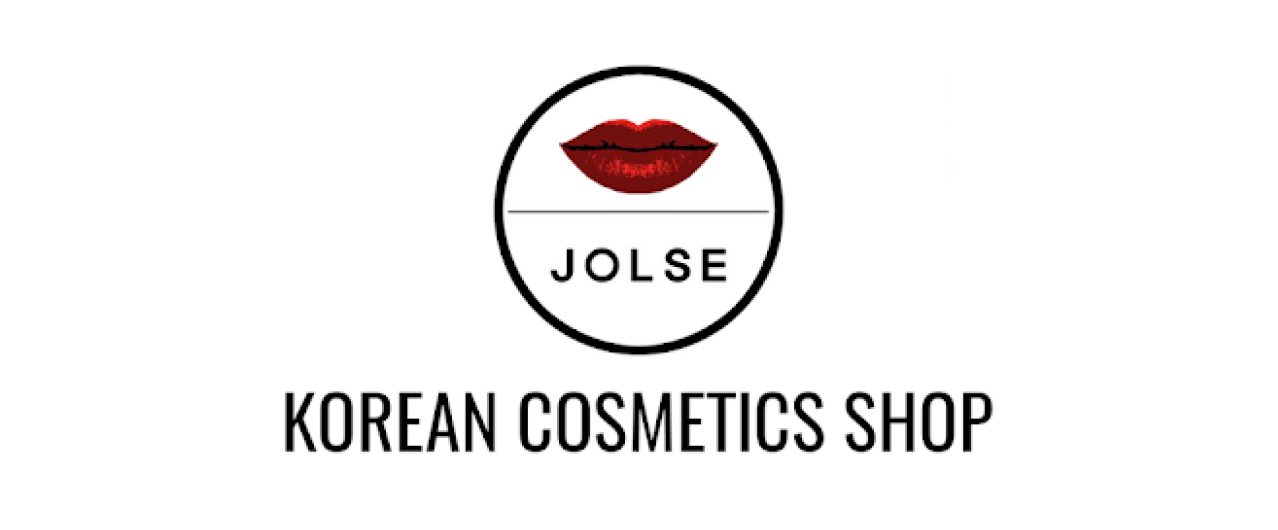

## **쇼핑몰 크롤링 (정적 크롤링)**
- 특정 상품의 시세파악을 위해서는 상품을 판매하는 쇼핑몰 데이터를 추출하여 파악하는 것이 일반적
- 특정 사이트를 선정하여 주기적으로 상품의 가격 변화를 확인
- 사이트 선정 시 구성이 변화되지 않고, 접속량이 일정 수준 이상인 사이트를 선정
- https://jolse.com/index.html
- 크롤링 항목 : 제품명, 가격, 세일가격

### **🔸 특정 페이지로 예시 코드 생성**
- 모든 페이지가 동일한 layout이기 때문에 특정 페이지로 예시 코드 작성 후, 함수화 진행하여 모든 페이지에 대해 적용할 예정
- 예시 코드 페이지 : http://jolse.com/category/toners-mists/1019/

#### **쇼핑몰 크롤링 시 자주 발생하는 '인증 에러'**
- 인증 에러 [SSL:CERTIFICATE_VERIFY_FAILED]
- SSL 패키지 활용해서 인증을 전송하면 해결됨

In [65]:
# SSL 패키지
import ssl

In [66]:
# context 객체 활용 (인증에 대해 검사하지 않도록 하는 객체)
context = ssl._create_unverified_context()
url = 'http://jolse.com/category/toners-mists/1019/'
html = urlopen(url, context=context) # url 서버에 context 전달 
htmls = html.read()

#### **크롤링 진행**
- 크롤링 항목 : 제품명, 가격, 세일가격

In [67]:
# 파싱 객체 생성
bs_obj = bs4.BeautifulSoup(htmls, 'html.parser')

In [68]:
# 제품들이 포함된 영역에 대한 Selector : uls 

# uls = bs_obj.findAll('ul', {'class':'prdList grid5'})
uls = bs_obj.findAll('ul', {'class':'prdList'}) # Selector 명에 띄어쓰기가 있으면 앞 부분만 이용해도 추출 가능 
len(uls) 

# => 한 페이지당 1개의 ul (페이지) & 20개의 li (제품) 이 있지 않을까?

1

In [69]:
# 제품들에 대한 Selector : li ❌
len(uls[0].findAll('li'))

# => 20개가 아니라 60개가 나옴. 정확히 제품에 대한 selector 가 아닌 것 같음

60

In [70]:
# 제품들에 대한 Selector : div ✅
len(uls[0].findAll('div', {'class':'description'}))

# => 정확히 20개가 나옴. 이 Selector로 변수로 저장해 사용
boxes = uls[0].findAll('div', {'class':'description'})
boxes[0]

20

<div class="description">
<span class="chk"><input class="ProductCompareClass xECPCNO_16241" type="checkbox"/></span>
<span class="prd-brand"></span>
<strong class="name"><a class="" href="/product/some-by-mi-aha-bha-pha-30-days-miracle-toner-150ml/16241/category/1019/display/1/"><span class="title displaynone"><span style="font-size:14px;color:#555555;font-weight:bold;">Product Name</span> :</span> <span style="font-size:14px;color:#555555;font-weight:bold;">SOME BY MI AHA BHA PHA 30 Days Miracle Toner 150ml</span></a></strong>
<ul class="xans-element- xans-product xans-product-listitem spec"><li class="xans-record-">
<strong class="title displaynone"><span style="font-size:16px;color:#888888;">Price</span></strong> <span style="font-size:16px;color:#888888;text-decoration:line-through;">USD 24.00</span><span id="span_product_tax_type_text" style="text-decoration:line-through;"> </span></li>
<li class="xans-record-">
<strong class="title"><span style="font-size:20px;color:#ff2d46;font

In [71]:
# 제품명
print('a 태그 확인: ', boxes[0].a.text)
print('제품명만 추출: ', boxes[0].a.text.split(':')[1])

a 태그 확인:  Product Name : SOME BY MI AHA BHA PHA 30 Days Miracle Toner 150ml
제품명만 추출:   SOME BY MI AHA BHA PHA 30 Days Miracle Toner 150ml


In [72]:
# 가격 / 세일가격

## 1번째 li는 '원래 가격', 2번째 li는 '세일 가격 임을 확인
print('li 태그 확인: ', boxes[0].ul.select('li'))

## 가격 text 형태 확인
print('가격 text 형태 확인: ', boxes[0].ul.select('li')[0].text)

## 숫자만 추출하도록 가공
org_price = boxes[0].ul.select('li')[0].text.split(' ')[2]
sale_price = boxes[0].ul.select('li')[1].text.split(' ')[2]
print('가격 및 세일가격: ', org_price, sale_price)

## 세일하지 않는 제품이 있을 수 있으므로 sale_price는 try~except 적용해야 함 

li 태그 확인:  [<li class="xans-record-">
<strong class="title displaynone"><span style="font-size:16px;color:#888888;">Price</span></strong> <span style="font-size:16px;color:#888888;text-decoration:line-through;">USD 24.00</span><span id="span_product_tax_type_text" style="text-decoration:line-through;"> </span></li>, <li class="xans-record-">
<strong class="title"><span style="font-size:20px;color:#ff2d46;font-weight:bold;"></span></strong> <span style="font-size:20px;color:#ff2d46;font-weight:bold;">USD 17.99</span></li>]
가격 text 형태 확인:  
Price USD 24.00 
가격 및 세일가격:  24.00 17.99


In [73]:
# 첫번째 페이지 제품 data 

## 제품 정보를 담을 빈 list 생성
product = []
org_price = []
sale_price = []

## 반복문 활용하여 첫번째 페이지의 모든 제품 정보를 수집
for box in boxes:
    product.append(box.a.text.split(':')[1])
    org_price.append(box.ul.select('li')[0].text.split(' ')[2])
    try:
        sale_price.append(box.ul.select('li')[1].text.split(' ')[2])
    except:
        sale_price.append(org_price)

In [74]:
pd.DataFrame({'제품명':product, '가격':org_price, '세일가격':sale_price})

,제품명,가격,세일가격
0,SOME BY MI AHA BHA PHA 30 Days Miracle Toner ...,24.00,17.99
1,COSRX AHA/BHA CLARIFYING TREATMENT TONER 150ml,17.25,11.99
2,COSRX BHA BLACKHEAD POWER LIQUID 100 ML,20.81,14.49
3,Pyunkang Yul Essence Toner 200ml,21.90,13.49
4,ROUND LAB 1025 Dokdo Toner 200ml,17.00,13.60
5,Beauty of Joseon Ginseng Essence Water 150ml,24.55,19.64
6,COSRX Full Fit Propolis Synergy Toner 150ml,28.00,12.89
7,Isntree Green tea Fresh Toner 200ml,19.90,15.92
8,Isntree Hyaluronic Acid Toner 200ml (Renewal),19.30,14.24
9,Anua Heartleaf 77% Soothing Toner 250ml,28.00,17.29


### **🔸 모든 페이지에 적용 할 함수 생성**

#### **함수를 기능별로 세분화**
1. 서버에 요청 후 응답된 data를 파싱객체로 생성 후 반환하는 함수
   - `get_request_product(url)`
   - bs4 객체 반환
2. 페이지의 전체 제품 정보를 추출
   - `get_page_product(bs4객체)`
   - bs4객체를 전달 받아서 전체제품정보 추출
   - 추출된 전체제품에서 제품 1개씩 `get_product_info(box)`를 호출
   - 1개 제품을 df로 생성 후 전역 변수 (df_fin)에 추가
3. 각 제품의 정보 추출
   - `get_product_info(box)`
   - 1개의 제품에 대해 제품명/가격/세일가격을 추출해서 반환

In [75]:
# 전역으로 사용할 빈 df 생성
prd_dict = {'품목':[], '가격':[], '세일가격':[]}
df_fin = pd.DataFrame(prd_dict)
df_fin

,품목,가격,세일가격


In [76]:
# 1번 함수 생성
def get_request_product(url) :
    # context 객체 생성
    context = ssl._create_unverified_context()
    # urlopen() 요청
    htmls = urlopen(url, context=context)
    html = htmls.read()
    # bs4 객체 bs_obj 생성
    bs_obj = bs4.BeautifulSoup(html, 'html.parser')
    return bs_obj

In [77]:
# 2번 함수 : df에 data 추가
def get_page_product(url) :
    global df_fin # 전역변수(함수 내외부에서 모두 사용 가능)
    bs_obj = get_request_product(url)
    # 특정 페이지의 전체제품정보 추출
    uls = bs_obj.find('ul',{'class':'prdList'})
    boxes = uls.findAll('div',{'class':'description'})
    # 1개의 제품 정보 추출
    for box in boxes :
        res = pd.DataFrame(get_product_info(box),index=range(1,2)) # 1개의 제품 정보에 대하여 df 생성
        df_fin = pd.concat([df_fin,res], axis=0, ignore_index=True)

In [78]:
# 3번 함수 : 1개 제품의 정보 추출
def get_product_info(box) :
    product=box.a.text.split(':')[1]
    ori_price=box.ul.select('li')[0].text.split(' ')[2]
    try : 
        sale_price=box.ul.select('li')[1].text.split(' ')[2]
    except : 
        sale_price=ori_price
    # 호출한 곳에서 반환 data 활용 df 생성
    return {'품목':product, '가격':ori_price, '세일가격':sale_price}

#### **모든 페이지 추출**
- 해당 쇼핑몰의 Url 분석
- 각 페이지에 대하여 파라미터 page=x
- 기본 url + 페이지 파라미터

In [79]:
# 마지막 페이지의 페이지 번호
page = bs_obj.select('#contents > div.xans-element-.xans-product.xans-product-normalpaging.ec-base-paginate')
tmp = page[0].find('a', {'class':'last'})['href']
end = int(tmp.split('=')[1])
print(end, type(end))

21 <class 'int'>


In [80]:
base_url = 'https://jolse.com/category/toners-mists/1019/?page='
for i in range(1,end+1) :
    url=base_url + str(i)
    get_page_product(url)

In [81]:
df_fin.tail()

,품목,가격,세일가격
412,Grafen CALMING GREEN SKIN 180ml,26.00,14.30
413,HOLIKA HOLIKA Premier Collagen Toner 125ml,32.16,27.34
414,SELENUS Artemisia Calming Us Toner 155ml,19.00,16.15
415,Dr.oracle TerpinaC Toner 200ml,21.80,18.53
416,preange Angelica Toner Quick Calming Pad 5ea,12.00,10.20


In [82]:
df_fin.to_csv('./crawl_data/shop_jolse_products.csv')